<a href="https://colab.research.google.com/github/1337Rinz/KhaiPhaDuLieuLon/blob/main/DoAn_KhaiPhaDuLieuLon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# source DATA https://www.kaggle.com/datasets/imkrkannan/lung-cancer-dataset-by-staceyinrobert
# Lê Tuấn Kiệt

In [65]:
import numpy as np
import pandas as pd

In [111]:
# đọc data
data = pd.read_csv('https://raw.githubusercontent.com/1337Rinz/KhaiPhaDuLieuLon/main/survey_lung_cancer.csv')

# print data.shape
print('data shape: ',data.shape)

# show 5 dòng đầu 
data.head(5)

data shape:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


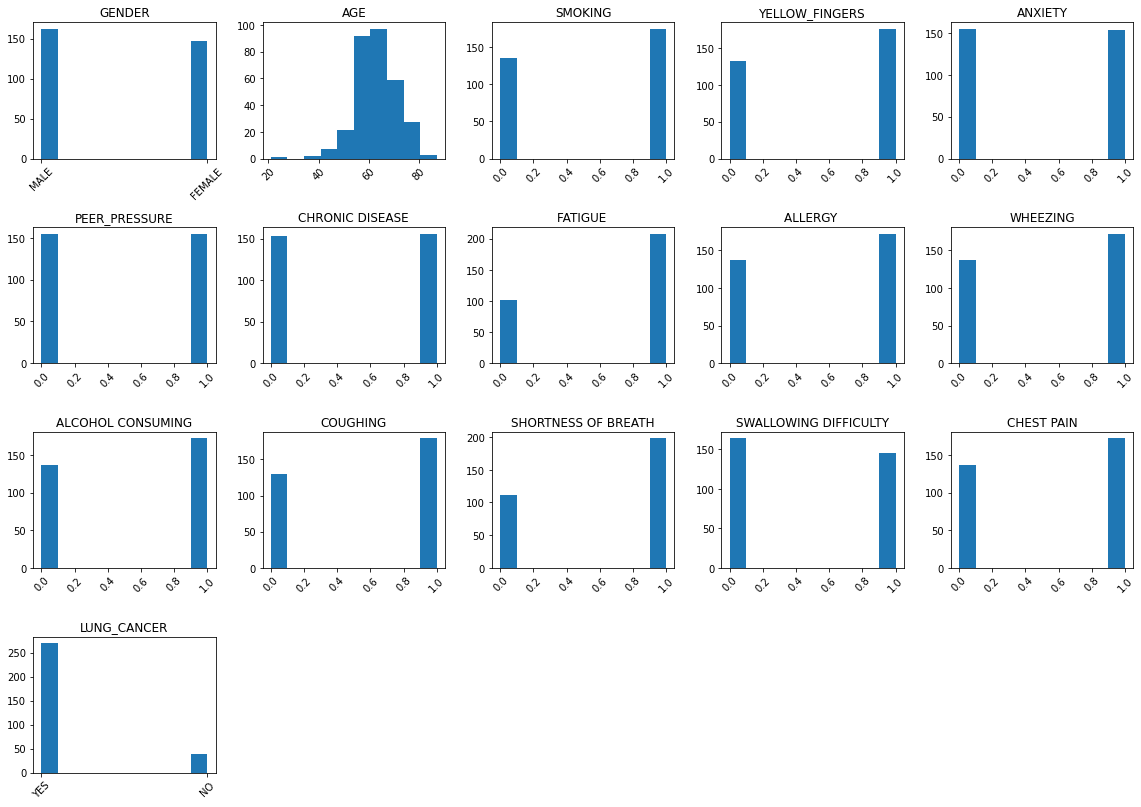

In [113]:
# Trực quan hoá toàn bộ data

import matplotlib.pyplot as plt


cols = list(data.columns)
cols_data=cols[:]

plt.figure(figsize=(16,28))
for i in range(len(cols_data)):
    plt.subplot(10,5,i+1)
    plt.title(cols_data[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_data[i]])
    
plt.tight_layout()

In [114]:
# ktra có dữ liệu khuyết không
# False = không có dữ liệu bị khuyết

nullValuesCheck = "Data không có dữ liệu khuyết" if data.isnull().values.any() == False else "Data có dữ liệu khuyết"

print(nullValuesCheck)
print("Data shape: ",data.shape)

Data không có dữ liệu khuyết
Data shape:  (309, 16)


In [115]:
# kiểm trùng và loại bỏ

data.drop_duplicates(inplace=True)
print("Data shape sau khi loại bỏ data trùng lặp: ",data.shape)     

Data shape sau khi loại bỏ data trùng lặp:  (276, 16)


YES    238
NO      38
Name: LUNG_CANCER, dtype: int64


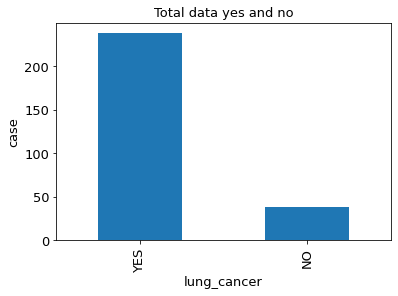

In [116]:
# đếm giá trị và Trực quan hoá cột mục tiêu (LUNG_CANCER)
import matplotlib.pyplot as plt



print(data["LUNG_CANCER"].value_counts())

plt.figure(figsize = (6,4))
plt.title("Total data yes and no",fontsize=13)
plt.xlabel("lung_cancer", fontsize=13)
plt.ylabel("case",fontsize=13)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=13)

# for i, v in enumerate((data["LUNG_CANCER"].value_counts())):
#   plt.text(v, i, str(v))

plt.show()

In [117]:
# chuẩn hóa các giá trị cột GENDER và cột LUNG_CANCER về kiểu số

data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='MALE' else 0)
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x=='YES' else 0)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


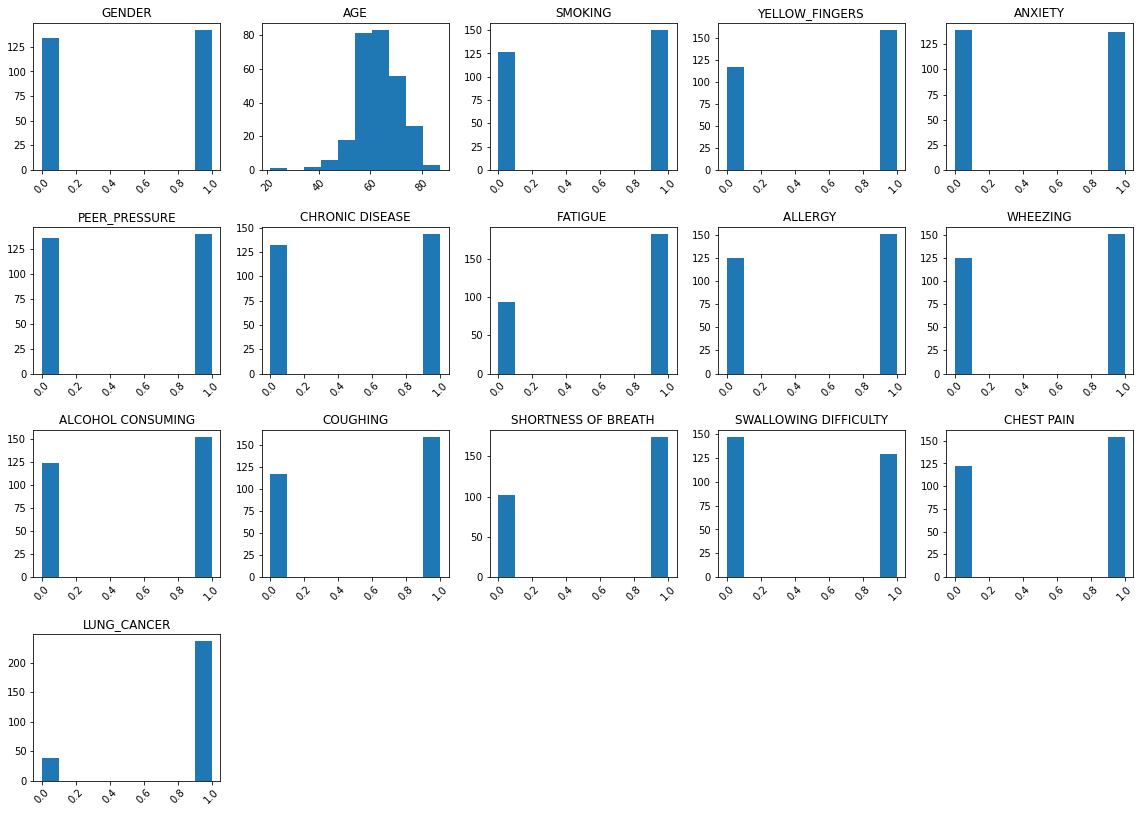

In [118]:
# Trực quan hoá toàn bộ data sau khi đã xử lý

import matplotlib.pyplot as plt

cols = list(data.columns)
cols_data=cols[:]

# khởi tạo figure(nền trắng chứa toàn bộ plot con)
plt.figure(figsize=(16,28))

for i in range(len(cols_data)):
    plt.subplot(10,5,i+1)         #plot con
    plt.title(cols_data[i])       #title tên cột
    plt.xticks(rotation=45)       
    plt.hist(data[cols_data[i]])  #Histogram(Biều đồ)
    
plt.tight_layout()

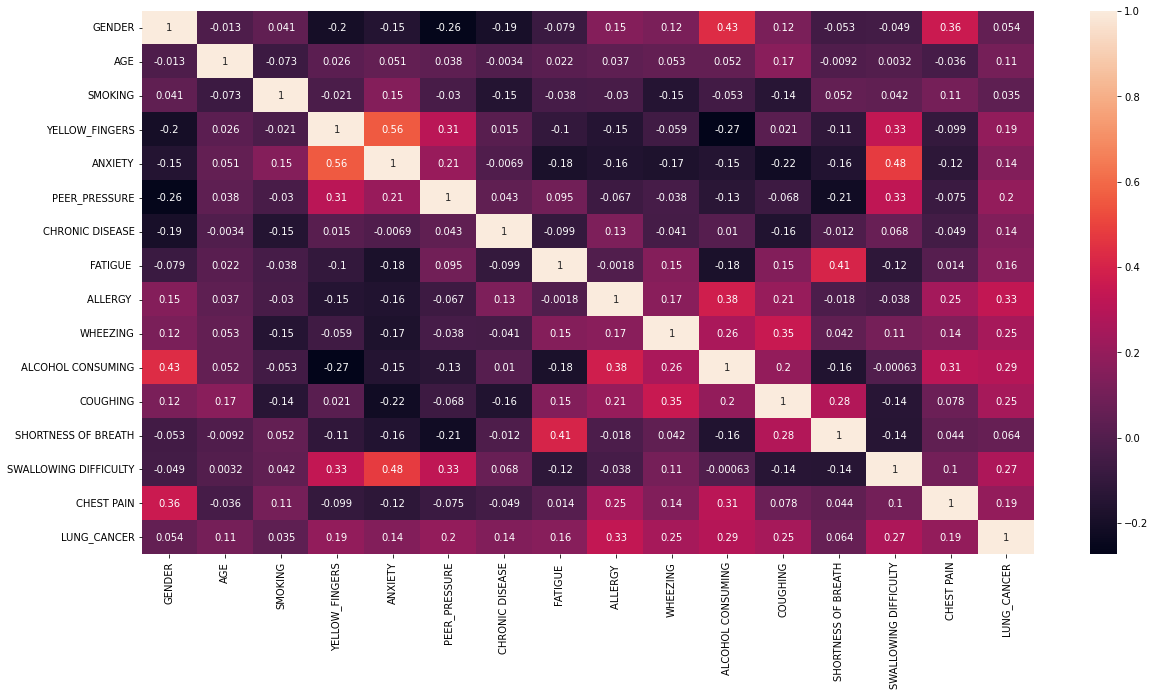

In [120]:
import seaborn as sns

# khởi tạo figure
plt.figure(figsize=(20,10))
# Ma trận tương quan bằng heatmap (plot Correlation Matrix)
sns.heatmap(data.corr(),annot=True)

In [62]:
# import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [63]:
# select 15 cột đầu for x ; cột LUNG_CANCER for y
# data.iloc[<row selection>,<column selection>]

x = data.iloc[ :,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values
x

array([[ 1, 69,  0, ...,  1,  1,  1],
       [ 1, 74,  1, ...,  1,  1,  1],
       [ 0, 59,  0, ...,  1,  0,  1],
       ...,
       [ 1, 58,  1, ...,  0,  0,  1],
       [ 1, 67,  1, ...,  1,  0,  1],
       [ 1, 62,  0, ...,  0,  1,  0]])

In [125]:
# chia tập train:test theo tỉ lệ 70:30 để đánh giá hiệu xuất; thiết lập random_state seed 

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30 , random_state=19)
print('x_train: ',x_train.shape)
print('x_test: ', x_test.shape)

x_train:  (216, 15)
x_test:  (93, 15)


In [131]:
# naive bayes trên tập train

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
model.predict(x_train)
print("accuracy = " ,accuracy_score(y_test, model.predict(x_test)))

score_4 = accuracy_score(y_test, model.predict(x_test))

accuracy =  0.9354838709677419


In [35]:
model_predict = model.predict(x_test)

print('accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, model_predict)))
accuracy_score = (metrics.accuracy_score(y_test, model_predict))

# True positive (TP) ; False positive (FP)
# False negative (FN); True negative (TN)
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

# Báo cáo
print('\nClassification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

accuracy: 0.92
[[67  2]
 [ 4  5]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        69
           0       0.71      0.56      0.63         9

    accuracy                           0.92        78
   macro avg       0.83      0.76      0.79        78
weighted avg       0.92      0.92      0.92        78



Precision = (TP/(TP+FP)

Recall = (TP/(TP+FN)

F1 Score = (2/((Precision^-1)+(Recall^-1))

In [36]:
# new input
GENDER=1
AGE=20
SMOKING =0
YELLOW_FINGERS = 0
ANXIETY = 0
PEER_PRESSURE = 1
CHRONIC_DISEASE = 0
FATIGUE =1
ALLERGY= 0
WHEEZING = 1
ALCOHOL_CONSUMING = 0
COUGHING = 1
SHORTNESS_OF_BREATH = 1
SWALLOWING_DIFFICULTY = 0
CHEST_PAIN =1

In [37]:
model_predict = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]
model_pred =model.predict(model_predict)

if model_pred == 1:
    result = "Có dấu hiệu bị ung thư phổi"
elif model_pred == 0 :
    result = "Không có dấu hiệu bị ung thư phổi"
else :
    result = "error "

print("Dựa trên thông tin được đưa vào\n với độ chính xác {:.2f} ta có dự đoán:\n >> {}".format((accuracy_score),result))

Dựa trên thông tin được đưa vào
 với độ chính xác 0.92 ta có dự đoán:
 >> Không có dấu hiệu bị ung thư phổi


#So sánh các thuật toán khác



In [127]:
# logisticregression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_models.append('logisticregression')
list_scores.append(score_1)

score_1
     

0.967741935483871

In [128]:

# Support vector machine

from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
list_scores.append(score_2)
list_models.append('svm')

score_2
     

0.9032258064516129

In [129]:

# randomforest classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_3=rfc.predict(x_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('randomforest classifier')
score_3
     

0.946236559139785

In [ ]:
list_scores.append(score_4)
list_models.append('naive bayes')


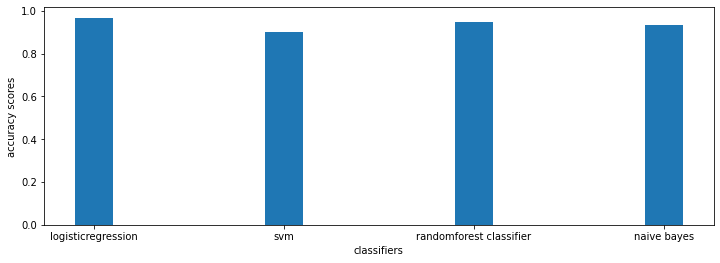

logisticregression :		 0.967741935483871
svm :		 0.9032258064516129
randomforest classifier :		 0.946236559139785
naive bayes :		 0.9354838709677419


In [150]:

plt.figure(figsize=(12,4))
plt.bar(list_models,list_scores,width=0.2)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

for i in range(len(list_models)):
  print(list_models[i],":\t\t",list_scores[i])